<a href="https://www.kaggle.com/code/chinmayphadkule4/complete-workflow-eda-ml-models?scriptVersionId=183471667" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"/kaggle/input/ibm-attrition-dataset/IBM.csv")

In [3]:
train.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
train.shape

(1470, 13)

In [5]:
train_original = train.copy()

In [6]:
train.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [7]:
train.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [8]:
train.shape

(1470, 13)

In [9]:
train['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [10]:
train['Attrition'].value_counts(normalize = True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

<Axes: xlabel='Attrition'>

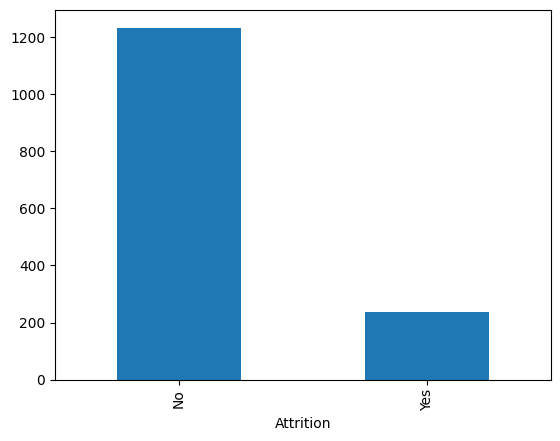

In [11]:
train['Attrition'].value_counts().plot.bar()

there are more employees who decided to stay with the company compared to those who left.


## Exploratory data analysis (EDA)

In [12]:
train.describe(include = 'all')

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,NaN,6,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,No,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Married,NaN,NaN,NaN,NaN
freq,NaN,1233,961,NaN,NaN,606,NaN,NaN,673,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,9.192517,2.912925,NaN,2.721769,2.728571,NaN,6502.931293,2.693197,2.761224,7.008163
std,9.135373,NaN,NaN,8.106864,1.024165,NaN,1.093082,1.102846,NaN,4707.956783,2.498009,0.706476,6.126525
min,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,2.000000,NaN,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,NaN,NaN,7.000000,3.000000,NaN,3.000000,3.000000,NaN,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,NaN,NaN,14.000000,4.000000,NaN,4.000000,4.000000,NaN,8379.000000,4.000000,3.000000,9.000000


In [13]:
train.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

Text(0.5, 1.0, 'Age distribution of Employees')

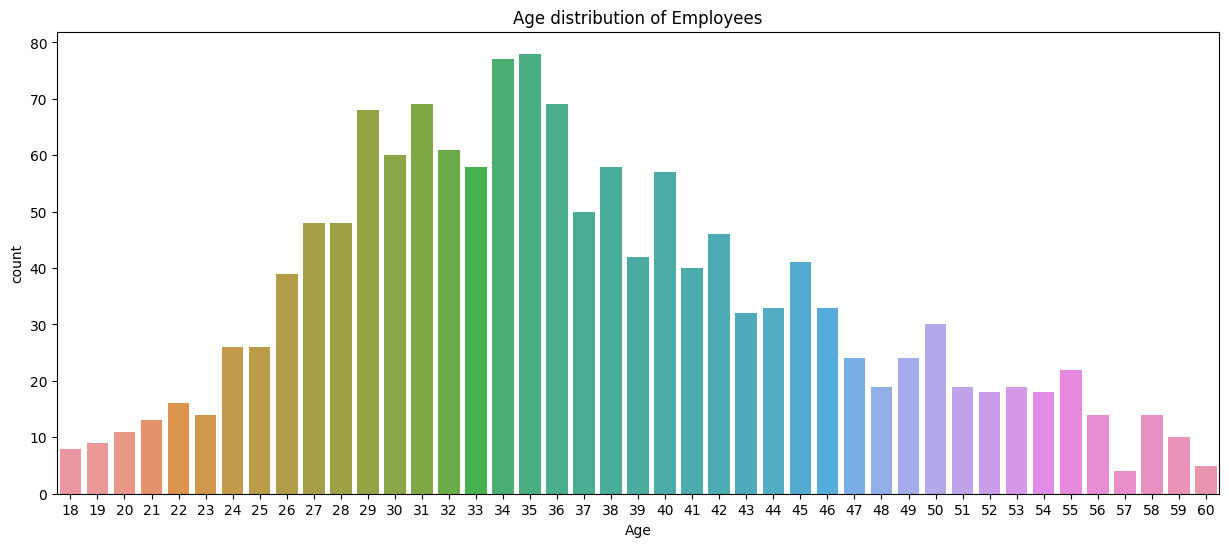

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data = train,x=train['Age'])
plt.title('Age distribution of Employees')

## Independent Variable (Ordinal)

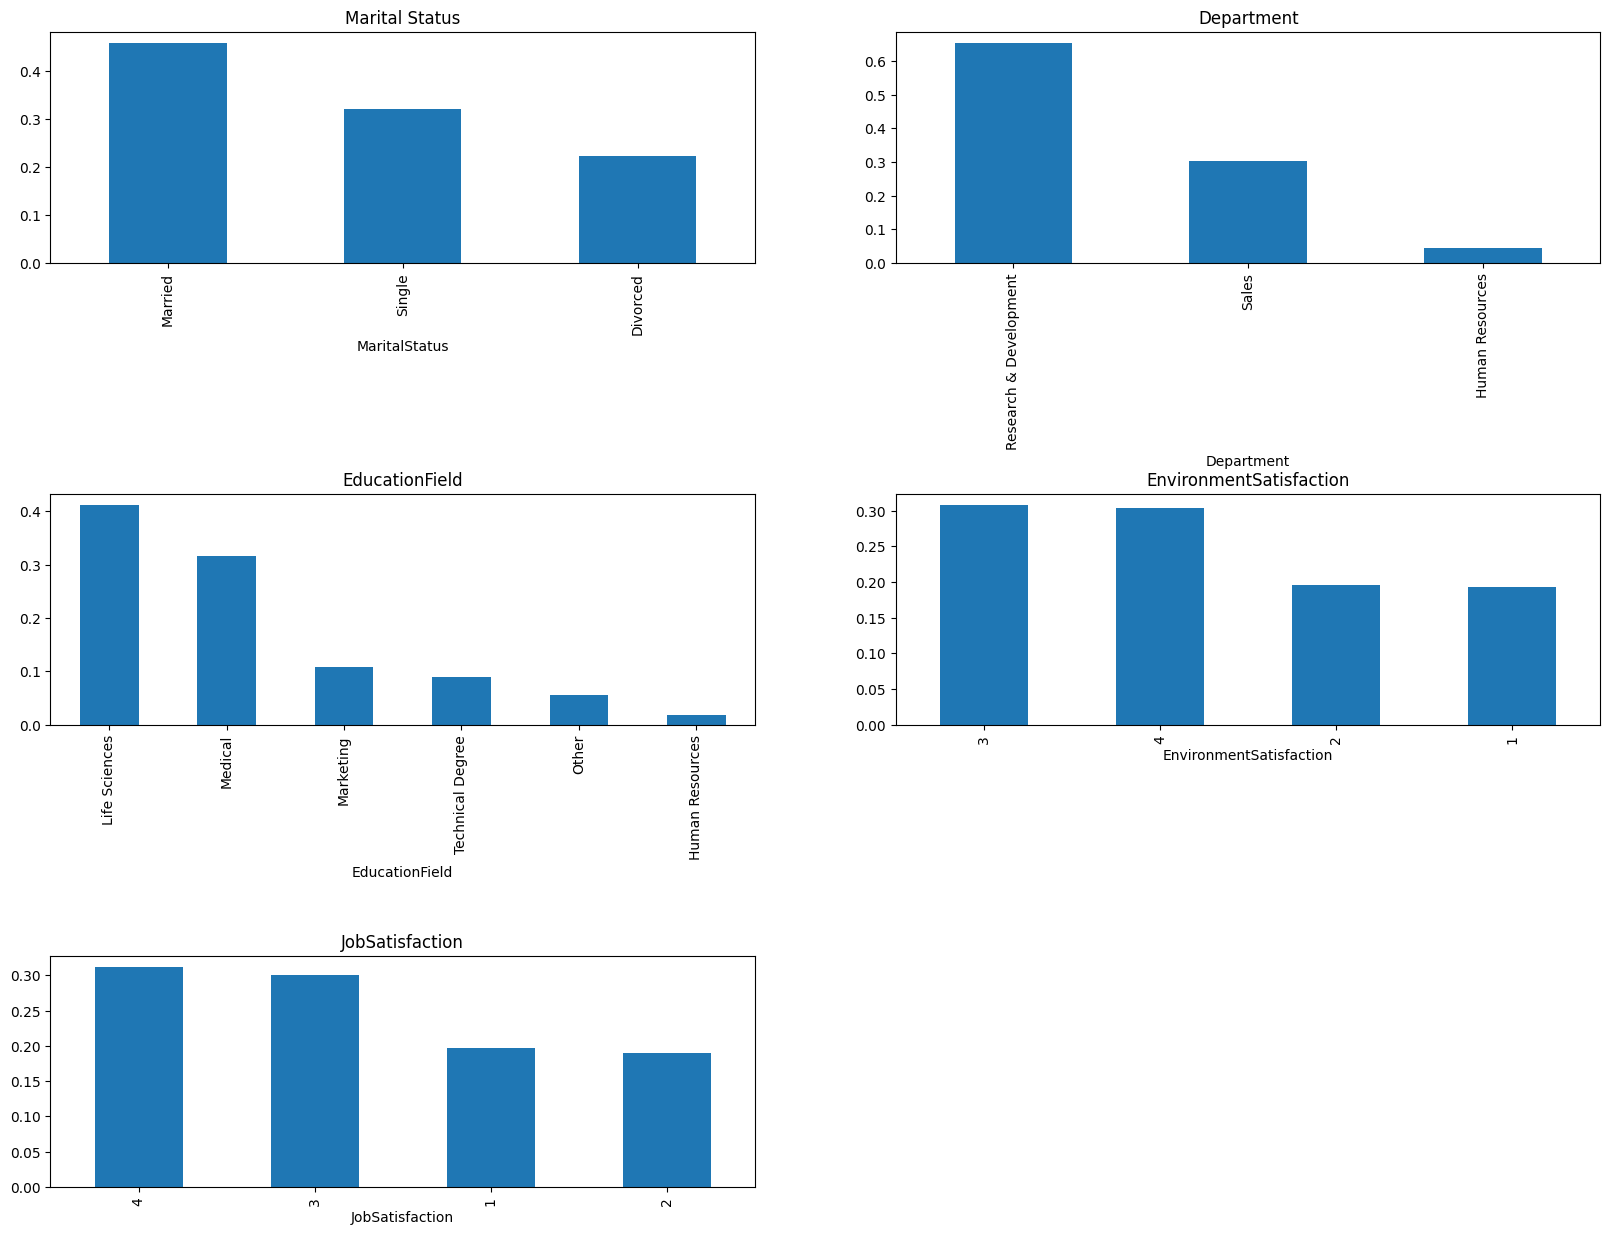

In [15]:
plt.figure(1)


plt.subplot(321)
train['MaritalStatus'].value_counts(normalize = True).plot.bar(figsize = (20, 15), title = 'Marital Status')

plt.subplot(322)
train['Department'].value_counts(normalize = True).plot.bar( title = 'Department')
# The first digit (3) indicates the number of rows in the subplot grid.
# The second digit (2) indicates the number of columns in the subplot grid.
# The third digit (2) indicates the position of the subplot being created, numbered sequentially from left to right, top to bottom.

plt.subplot(323)
train['EducationField'].value_counts(normalize = True).plot.bar( title = 'EducationField')

plt.subplot(324)
train['EnvironmentSatisfaction'].value_counts(normalize = True).plot.bar( title = 'EnvironmentSatisfaction')

plt.subplot(325)
train['JobSatisfaction'].value_counts(normalize = True).plot.bar( title = 'JobSatisfaction')

# plt.show()
# fig.tight_layout()
plt.subplots_adjust(wspace=None, hspace=1)

It can be inferred from the above bar plots that:

Most of the applicants are married.

Around 70% of the applicants are works in Research and development department, 30% in sales department and less than 10% employess works in a human resource department.

Most of the applicants are from Life science educational field.



In [16]:
train['JobSatisfaction']

0       4
1       2
2       3
3       3
4       2
       ..
1465    4
1466    1
1467    2
1468    2
1469    3
Name: JobSatisfaction, Length: 1470, dtype: int64

Independent Variable (Numerical)

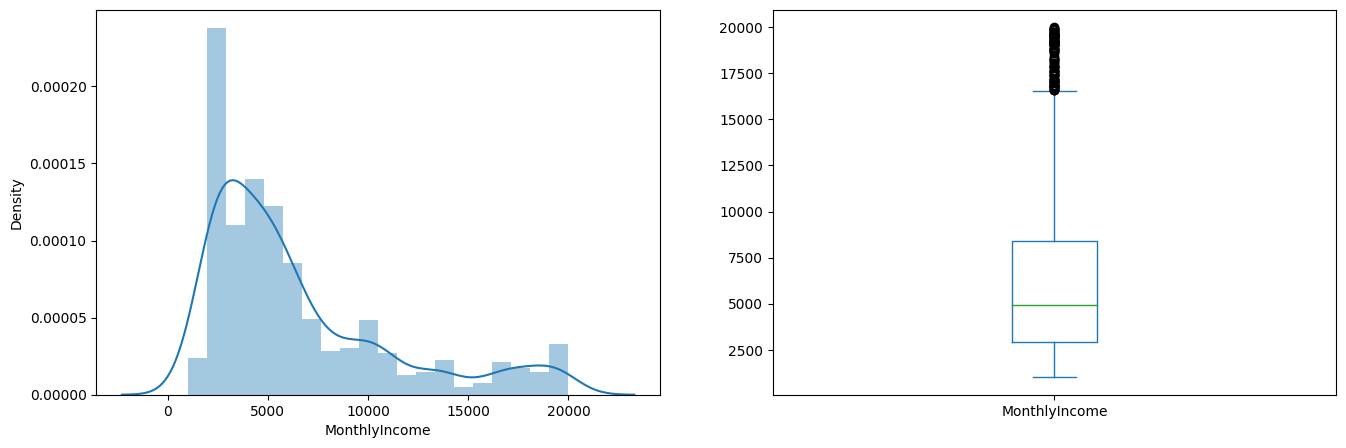

In [17]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['MonthlyIncome']); 
plt.subplot(122) 
train['MonthlyIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

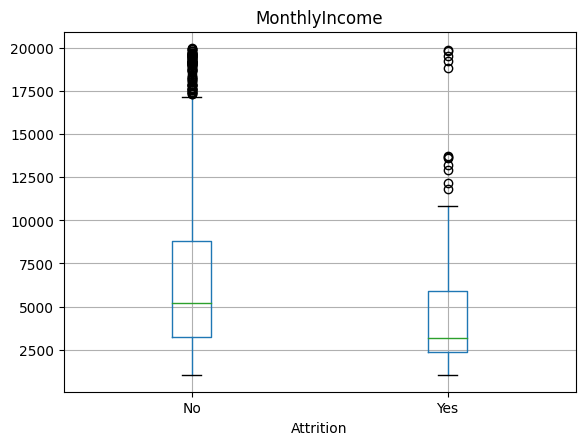

In [18]:
train.boxplot(column='MonthlyIncome', by = 'Attrition') 
plt.suptitle("")

higher number of graduates with very high Monthly incomes, which are appearing to be the outliers.

<Axes: xlabel='YearsAtCompany', ylabel='Density'>

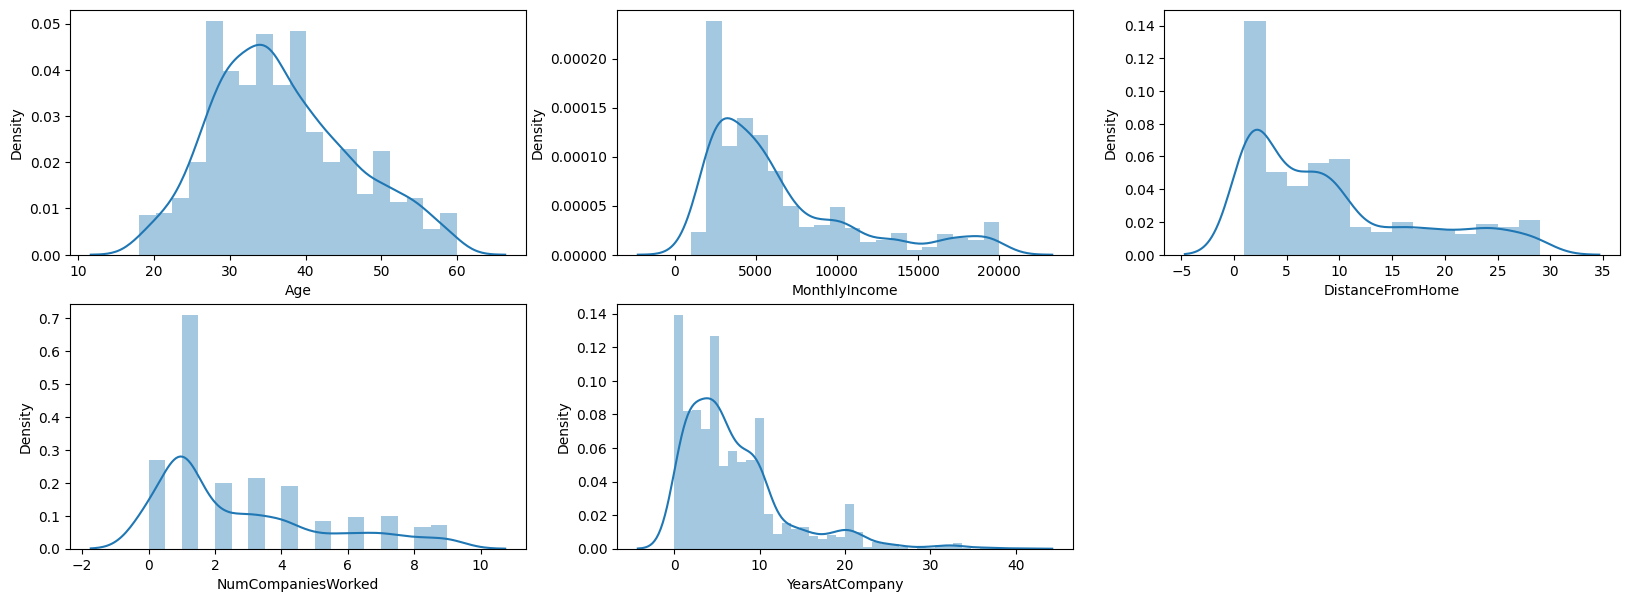

In [19]:
plt.figure(1,figsize=(20, 7))

plt.subplot(231)
sns.distplot(train['Age'])

plt.subplot(232)
sns.distplot(train['MonthlyIncome'])

plt.subplot(233)
sns.distplot(train['DistanceFromHome'])

plt.subplot(234)
sns.distplot(train['NumCompaniesWorked'])

plt.subplot(235)
sns.distplot(train['YearsAtCompany'])


# plt.subplots_adjust(wspace=1, hspace=20)

Text(0.5, 1.0, 'YearsAtCompany')

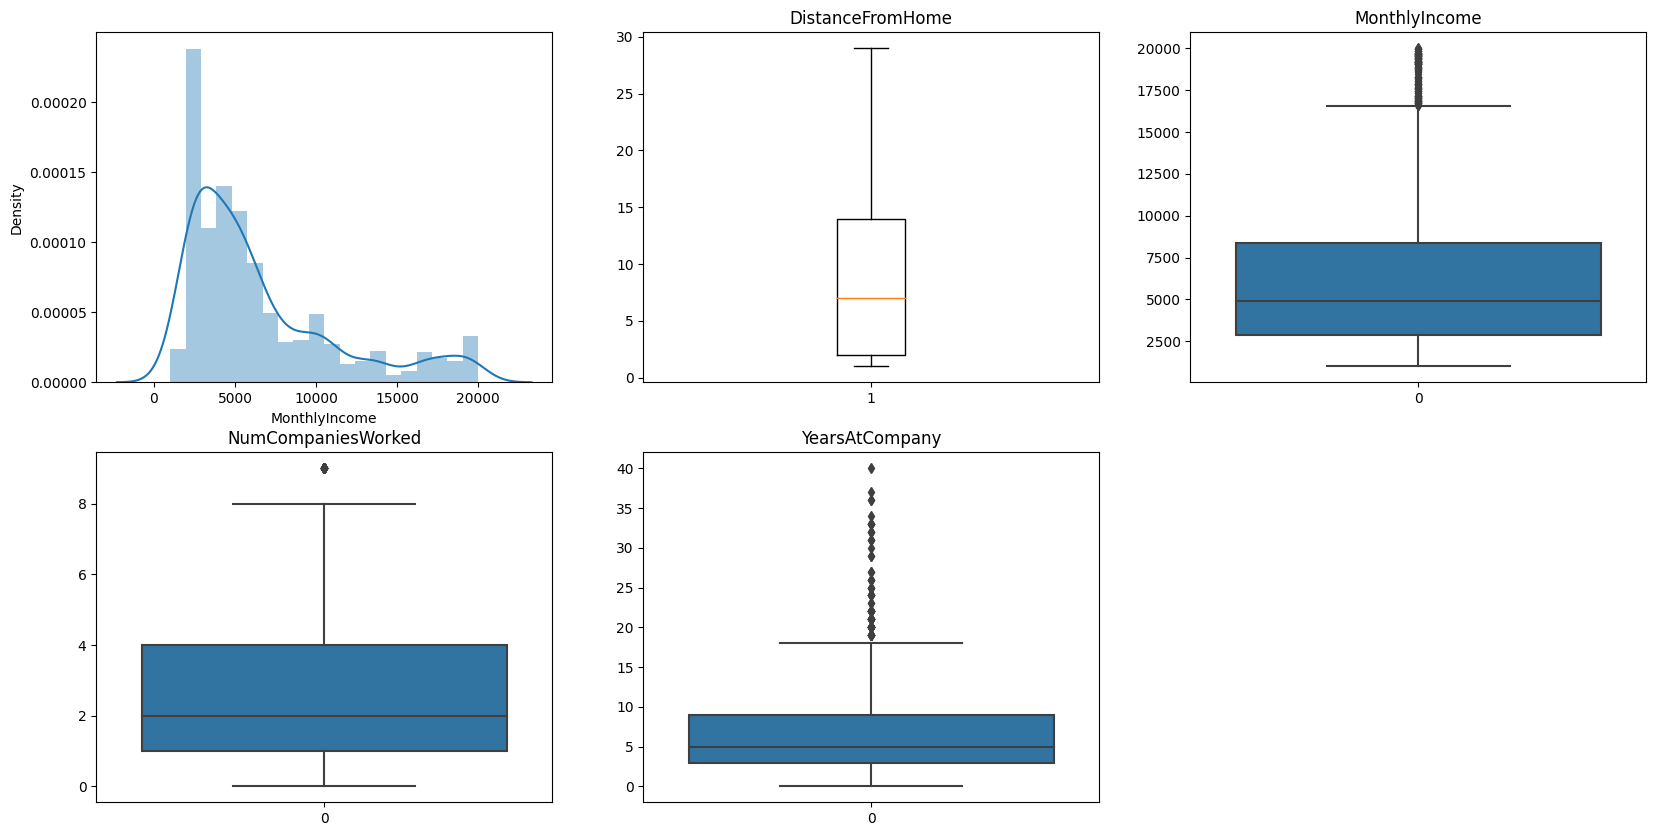

In [20]:
plt.figure(1,figsize=(20, 10))

plt.subplot(231)
sns.distplot(train['MonthlyIncome']); 

plt.subplot(232)
plt.boxplot(train['DistanceFromHome'])
plt.title('DistanceFromHome')

plt.subplot(233)
sns.boxplot(train['MonthlyIncome'])
plt.title('MonthlyIncome')

plt.subplot(234)
sns.boxplot(train['NumCompaniesWorked'])
plt.title('NumCompaniesWorked')

plt.subplot(235)
sns.boxplot(train['YearsAtCompany'])
plt.title('YearsAtCompany')


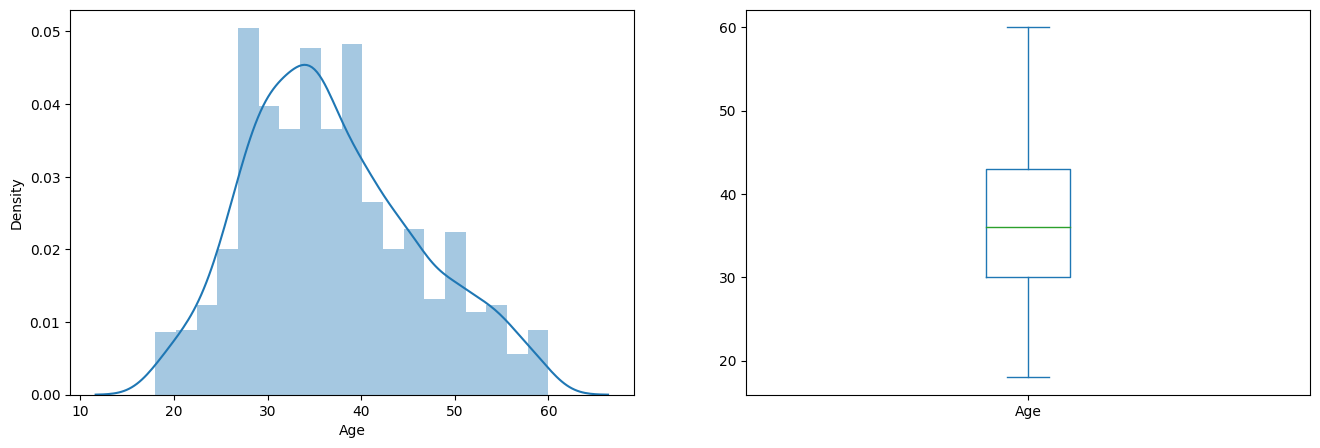

In [21]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['Age']); 
plt.subplot(122) 
train['Age'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

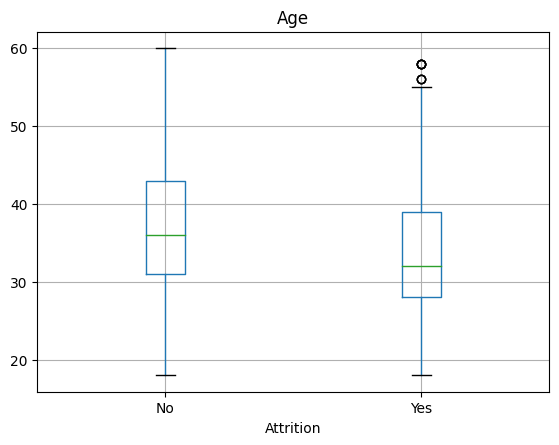

In [22]:
train.boxplot(column = 'Age', by = 'Attrition')
plt.suptitle("")

<Axes: xlabel='Age', ylabel='count'>

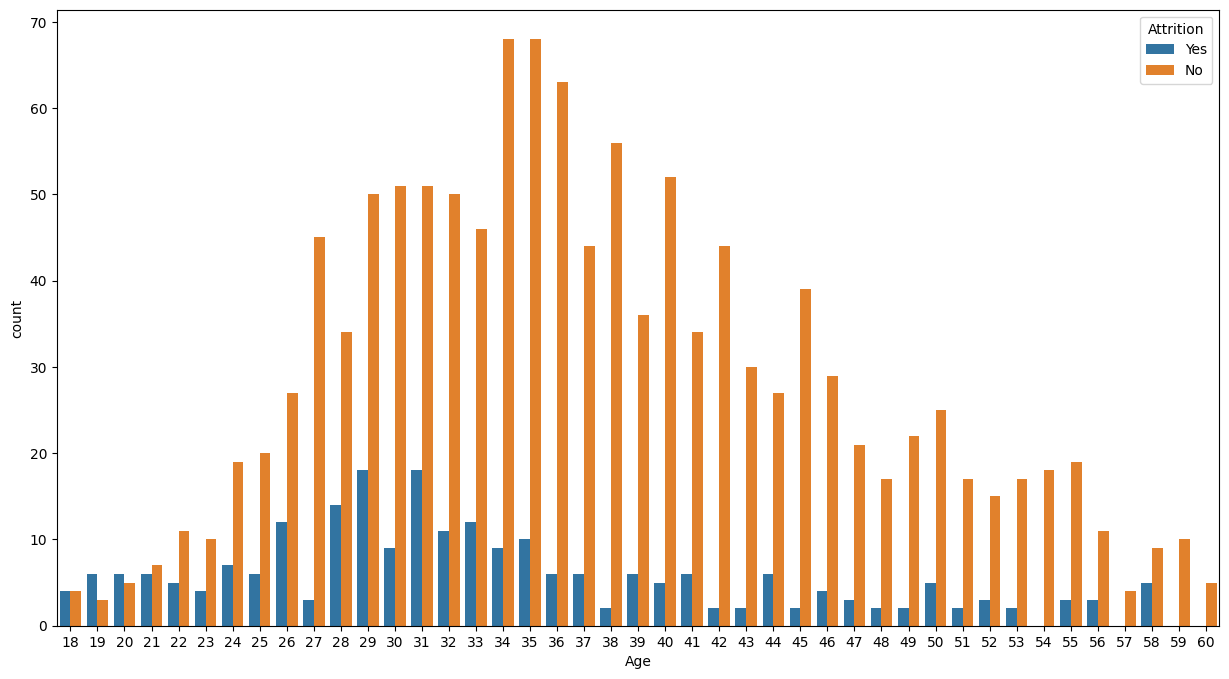

In [23]:
plt.figure(figsize = (15,8))

sns.countplot(data = train, x = 'Age', hue = 'Attrition')

## Categorical Independent Variable v/s Target Variable

<Axes: xlabel='MaritalStatus'>

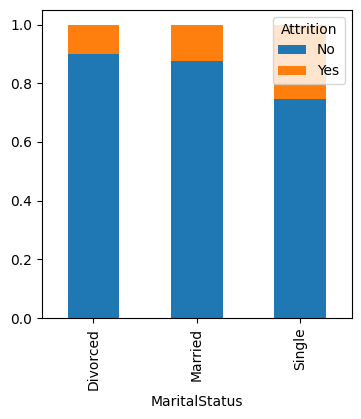

In [24]:
MaritalStatus = pd.crosstab(train['MaritalStatus'], train['Attrition'])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (4,4))
# MaritalStatus

It can be inferred that the proportion of Diverced and Married employees is more or less same for both attrition and not attrition.
but single employees attrition is more than Diverced and Married employees

In [25]:
Department = pd.crosstab(train['Department'], train['Attrition'])

Department

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [26]:
sub_df = df[['Department','Attrition','DistanceFromHome']]

sub_df.pivot_table(values = 'DistanceFromHome',index = 'Department',columns = 'Attrition', aggfunc='count')

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


In [27]:
Department.div(Department.sum(1).astype(float), axis=0)

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


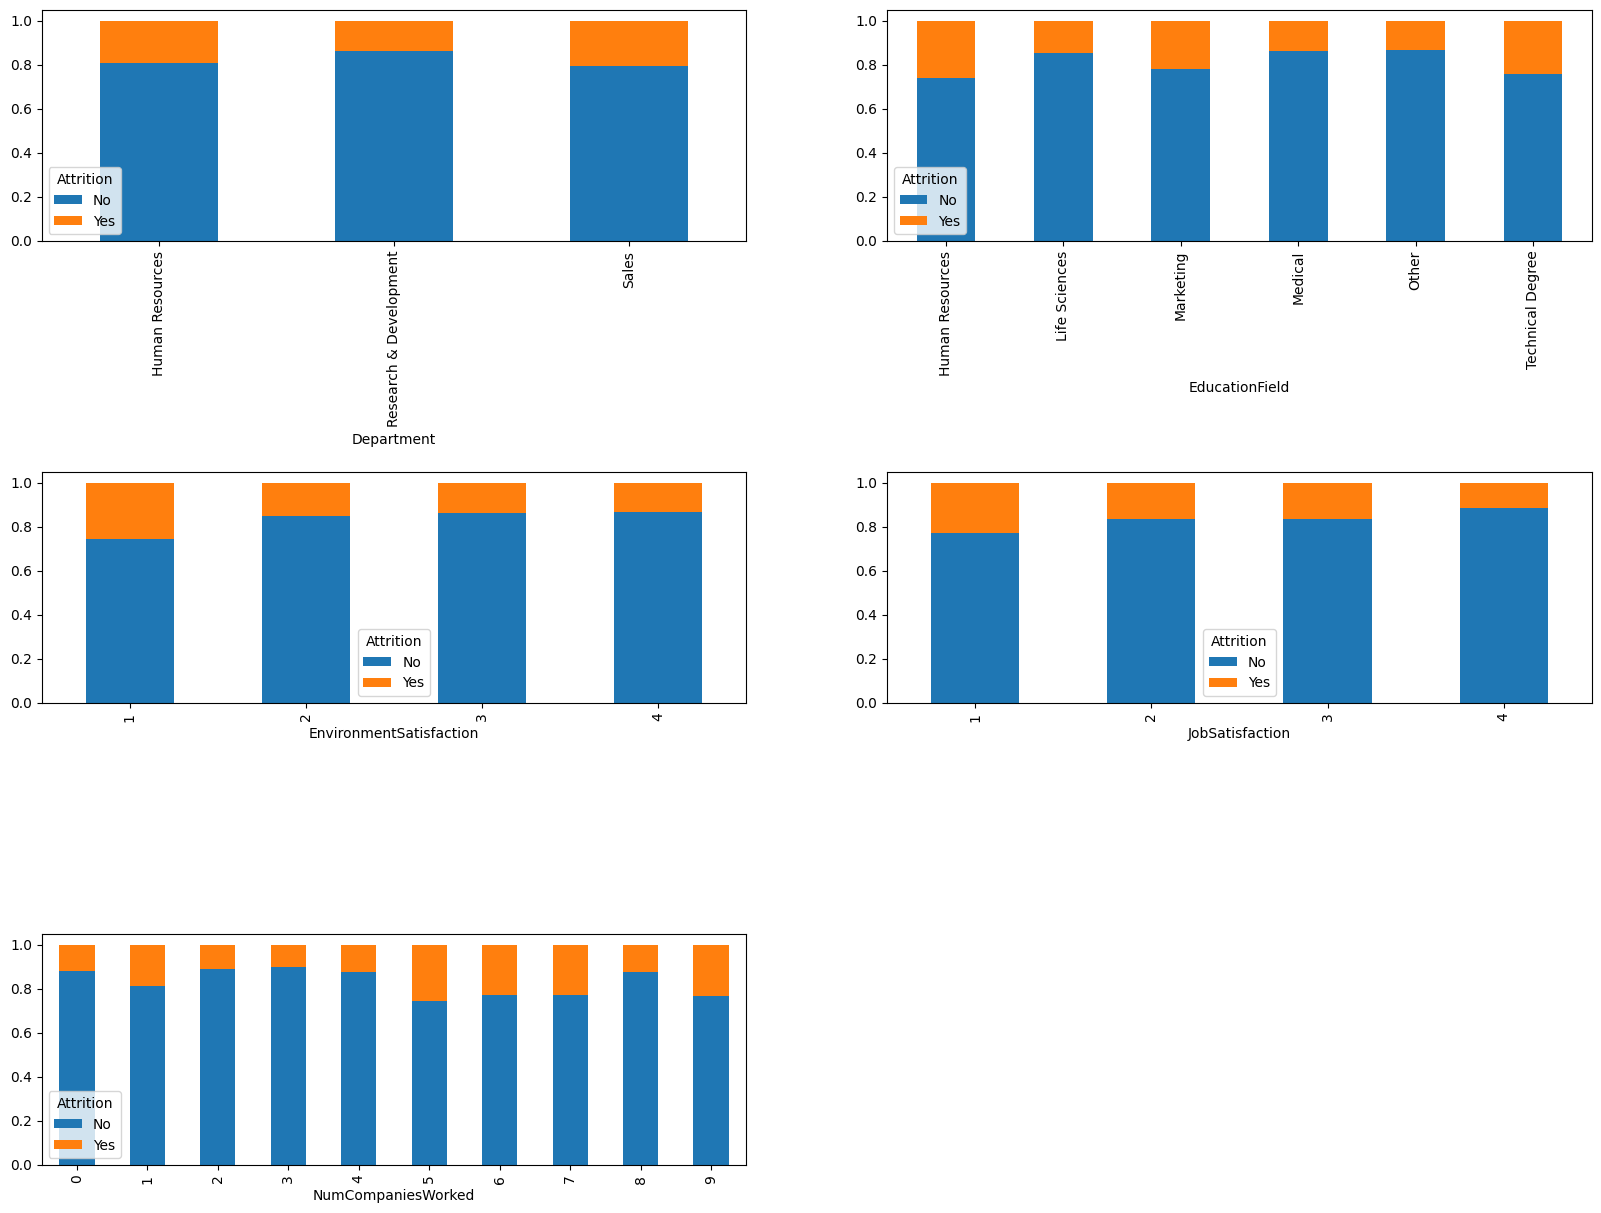

In [28]:
Department = pd.crosstab(train['Department'], train['Attrition'])
EducationField = pd.crosstab(train['EducationField'], train['Attrition'])
EnvironmentSatisfaction = pd.crosstab(train['EnvironmentSatisfaction'], train['Attrition'])
JobSatisfaction = pd.crosstab(train['JobSatisfaction'], train['Attrition'])
NumCompaniesWorked = pd.crosstab(train['NumCompaniesWorked'], train['Attrition'])
Education = pd.crosstab(train['Education'], train['Attrition'])

plt.figure(1, figsize = (20,15))

Department.div(Department.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,ax=plt.subplot(321)) 

EducationField.div(EducationField.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,ax=plt.subplot(322)) 

EnvironmentSatisfaction.div(EnvironmentSatisfaction.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = plt.subplot(323)) 

JobSatisfaction.div(JobSatisfaction.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = plt.subplot(324)) 

NumCompaniesWorked.div(NumCompaniesWorked.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,  ax = plt.subplot(325)) 

plt.subplots_adjust(wspace=None, hspace=1)

## Numerical Independent Variable vs Target Variable

<Axes: xlabel='Attrition'>

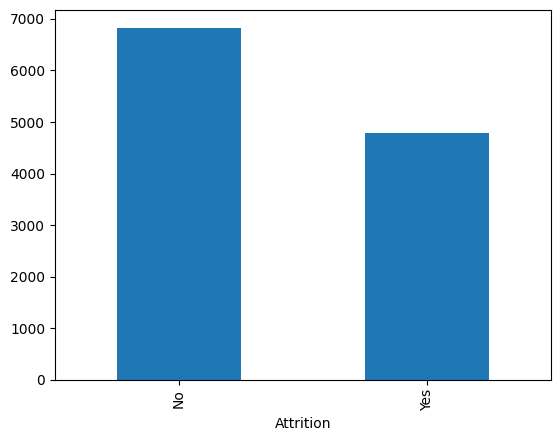

In [29]:
train.groupby('Attrition')['MonthlyIncome'].mean().plot.bar()

It can be inferred that employees income affect the attrition which contradicts our hypothesis in which we assumed that if the applicant income is high then the chances of attrition will be low.

In [30]:
# train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

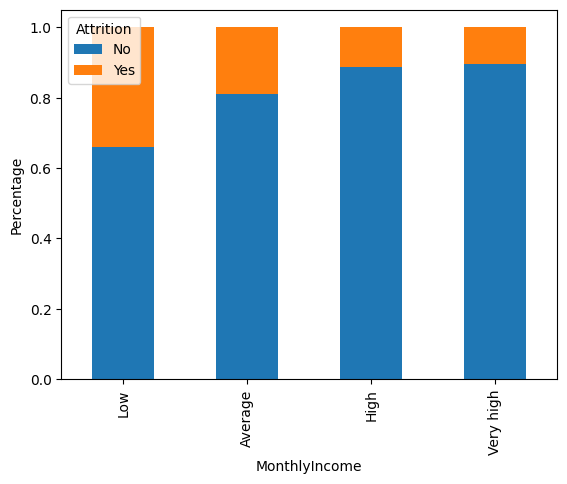

In [31]:
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very high']
train['MonthlyIncome_bin']=pd.cut(df['MonthlyIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['MonthlyIncome_bin'],train['Attrition']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('MonthlyIncome') 
P = plt.ylabel('Percentage')


It can be inferred that EMPLOYEES income affect the chances ATTRITIO which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of attrition will also be low.

In [32]:
train = train.drop(['MonthlyIncome_bin'], axis = 1)

In [33]:
train['Attrition'].replace('No', 0,inplace=True) 
train['Attrition'].replace('Yes', 1,inplace=True)

<Axes: >

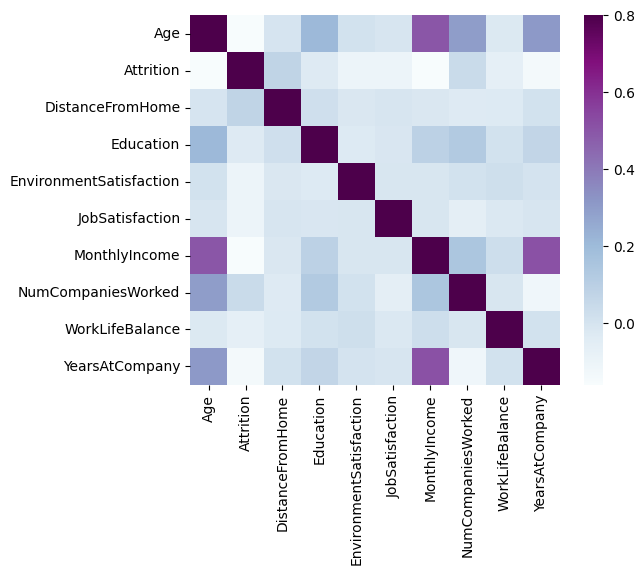

In [34]:
# matrix = train.corr()

sns.heatmap(train.select_dtypes(['int','float']).corr(), vmax=.8, square=True, cmap="BuPu")

We see that the most correlated variables are (MonthlyIncome)

## Missing value imputation

In [35]:
train.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

## Outlier Treatment

<Axes: >

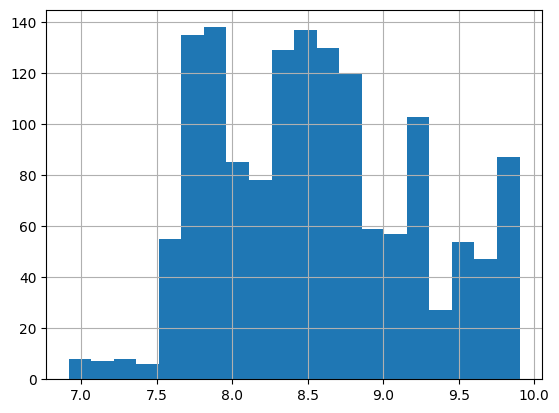

In [36]:
train['MonthlyIncome'] = np.log(train['MonthlyIncome'])
train['MonthlyIncome'].hist(bins = 20)


In [37]:
# train['NumCompaniesWorked'] = np.log(train['NumCompaniesWorked'])
# train['NumCompaniesWorked'].hist(bins = 2)


In [38]:
# train['YearsAtCompany'] = np.log(train['YearsAtCompany'])
# train['YearsAtCompany'].hist(bins = 7)


## Evaluation Metric

In [39]:
X = train.drop('Attrition', axis = 1)
y = train.Attrition

In [40]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [44]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8594104308390023

## Let’s import StratifiedKFold from sklearn and fit the model.

In [45]:
from sklearn.model_selection import StratifiedKFold

In [46]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)
    pred_test = model.predict(xtr)     
    score = accuracy_score(ytr,pred_test)     
    print('accuracy_score',score)
    i+=1
    
 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8503401360544217
accuracy_score 0.8545918367346939

2 of kfold 5
accuracy_score 0.8571428571428571
accuracy_score 0.8545918367346939

3 of kfold 5
accuracy_score 0.8469387755102041
accuracy_score 0.8579931972789115

4 of kfold 5
accuracy_score 0.8639455782312925
accuracy_score 0.8520408163265306

5 of kfold 5
accuracy_score 0.8503401360544217
accuracy_score 0.8494897959183674


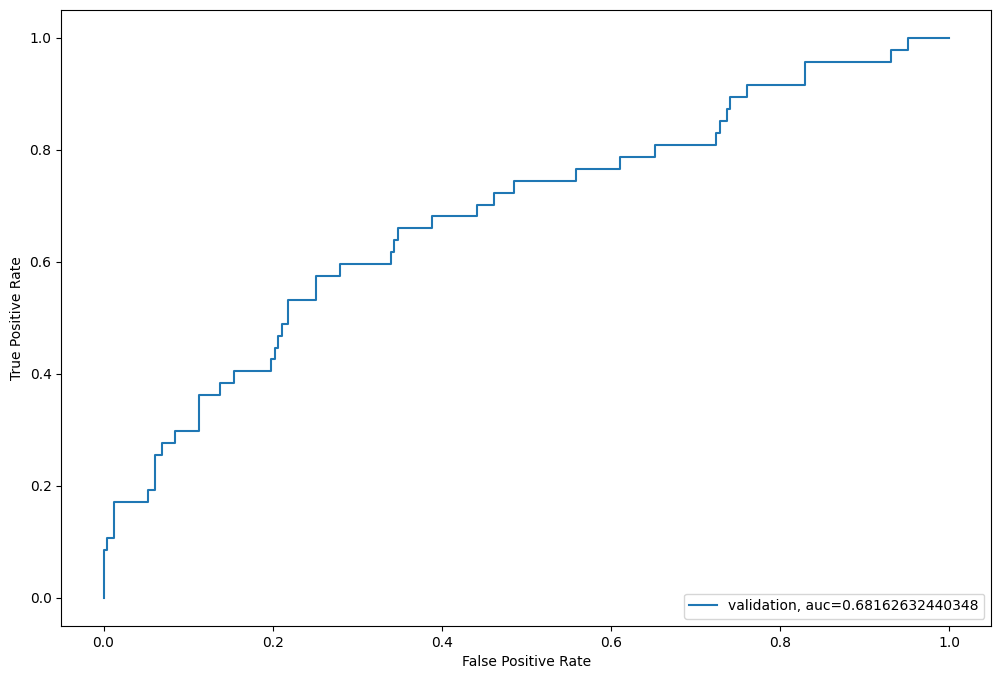

In [47]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [48]:
x_train.shape

(1029, 21)

In [49]:
y_train


445     0
1194    0
868     0
433     0
367     0
       ..
1036    1
1032    1
241     0
495     1
697     0
Name: Attrition, Length: 1029, dtype: int64

In [50]:
x_cv.shape

(441, 21)

In [51]:
x_train.shape

(1029, 21)

In [52]:
y_cv.shape


(441,)

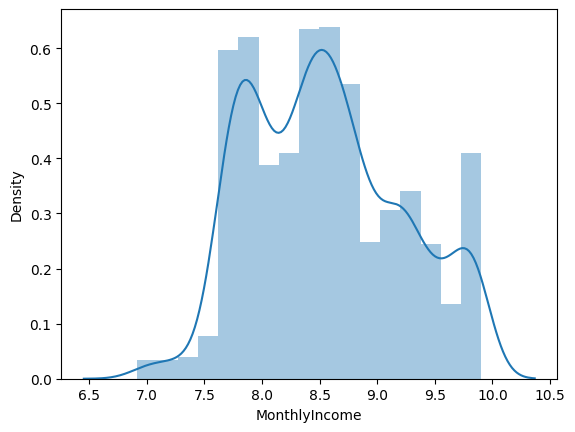

In [53]:
sns.distplot(train['MonthlyIncome']);

In [54]:
X = train.drop('Attrition',axis = 1) 
y = train.Attrition

## Logistic Regression

In [55]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         

    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
# pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8503401360544217

2 of kfold 5
accuracy_score 0.8571428571428571

3 of kfold 5
accuracy_score 0.8469387755102041

4 of kfold 5
accuracy_score 0.8639455782312925

5 of kfold 5
accuracy_score 0.8503401360544217


## Decision Tree

In [56]:
from sklearn import tree

In [57]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
# pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7448979591836735

2 of kfold 5
accuracy_score 0.782312925170068

3 of kfold 5
accuracy_score 0.7312925170068028

4 of kfold 5
accuracy_score 0.7585034013605442

5 of kfold 5
accuracy_score 0.7312925170068028


## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

# pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.826530612244898

2 of kfold 5
accuracy_score 0.8333333333333334

3 of kfold 5
accuracy_score 0.8469387755102041

4 of kfold 5
accuracy_score 0.8469387755102041

5 of kfold 5
accuracy_score 0.8537414965986394


We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [62]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_trian, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [65]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [66]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=1)

In [67]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
# pred_test = model.predict(test) 
# pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8367346938775511

2 of kfold 5
accuracy_score 0.8401360544217688

3 of kfold 5
accuracy_score 0.8367346938775511

4 of kfold 5
accuracy_score 0.8401360544217688

5 of kfold 5
accuracy_score 0.8401360544217688


## XGBOOST

In [68]:
# pip install xgboost

In [69]:
import xgboost

In [70]:
from xgboost import XGBClassifier

In [71]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1
    
# pred_test = model.predict(test) 
# pred3=model.predict_proba(test)[:,1]


6 of kfold 5
accuracy_score 0.8163265306122449

7 of kfold 5
accuracy_score 0.8231292517006803

8 of kfold 5
accuracy_score 0.8503401360544217

9 of kfold 5
accuracy_score 0.8469387755102041

10 of kfold 5
accuracy_score 0.8469387755102041


In [72]:
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
# for train_ind,test_ind in kf.split(X,y):
#     X_train, X_test = X.loc[train_ind],X.loc[test_ind]
#     y_train,y_test = y.loc[train_ind], y.loc[test_ind]
